In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [22]:
df=pd.read_csv('airfoil_self_noise.dat',sep='\t')

In [23]:
df

,800,0,0.3048,71.3,0.00266337,126.201
0,1000,0.0,0.3048,71.3,0.002663,125.201
1,1250,0.0,0.3048,71.3,0.002663,125.951
2,1600,0.0,0.3048,71.3,0.002663,127.591
3,2000,0.0,0.3048,71.3,0.002663,127.461
4,2500,0.0,0.3048,71.3,0.002663,125.571
...,...,...,...,...,...,...
1497,2500,15.6,0.1016,39.6,0.052849,110.264
1498,3150,15.6,0.1016,39.6,0.052849,109.254
1499,4000,15.6,0.1016,39.6,0.052849,106.604
1500,5000,15.6,0.1016,39.6,0.052849,106.224


In [24]:
columns=['Frequency','Angle of attack','Chord length','Free-stream velocity','Suction side displacement thickness','Scaled sound pressure level']
df.columns=columns


In [25]:
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1502 entries, 0 to 1501
Data columns (total 6 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Frequency                            1502 non-null   int64  
 1   Angle of attack                      1502 non-null   float64
 2   Chord length                         1502 non-null   float64
 3   Free-stream velocity                 1502 non-null   float64
 4   Suction side displacement thickness  1502 non-null   float64
 5   Scaled sound pressure level          1502 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 70.5 KB


,Frequency,Angle of attack,Chord length,Free-stream velocity,Suction side displacement thickness,Scaled sound pressure level
count,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000
mean,2887.769640,6.786818,0.136436,50.847137,0.011146,124.835034
std,3153.162983,5.917509,0.093471,15.569029,0.013153,6.900864
min,200.000000,0.000000,0.025400,31.700000,0.000401,103.380000
25%,800.000000,2.000000,0.050800,39.600000,0.002535,120.190000
50%,1600.000000,5.400000,0.101600,39.600000,0.004957,125.719000
75%,4000.000000,9.900000,0.228600,71.300000,0.015840,129.997750
max,20000.000000,22.200000,0.304800,71.300000,0.058411,140.987000


In [26]:
df.isnull().sum()

Frequency                              0
Angle of attack                        0
Chord length                           0
Free-stream velocity                   0
Suction side displacement thickness    0
Scaled sound pressure level            0
dtype: int64

In [27]:
# first do train test split because if we do on whole data then there will be data leakage
from sklearn.model_selection import train_test_split
X=df.drop('Scaled sound pressure level',axis=1)
y=df['Scaled sound pressure level']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


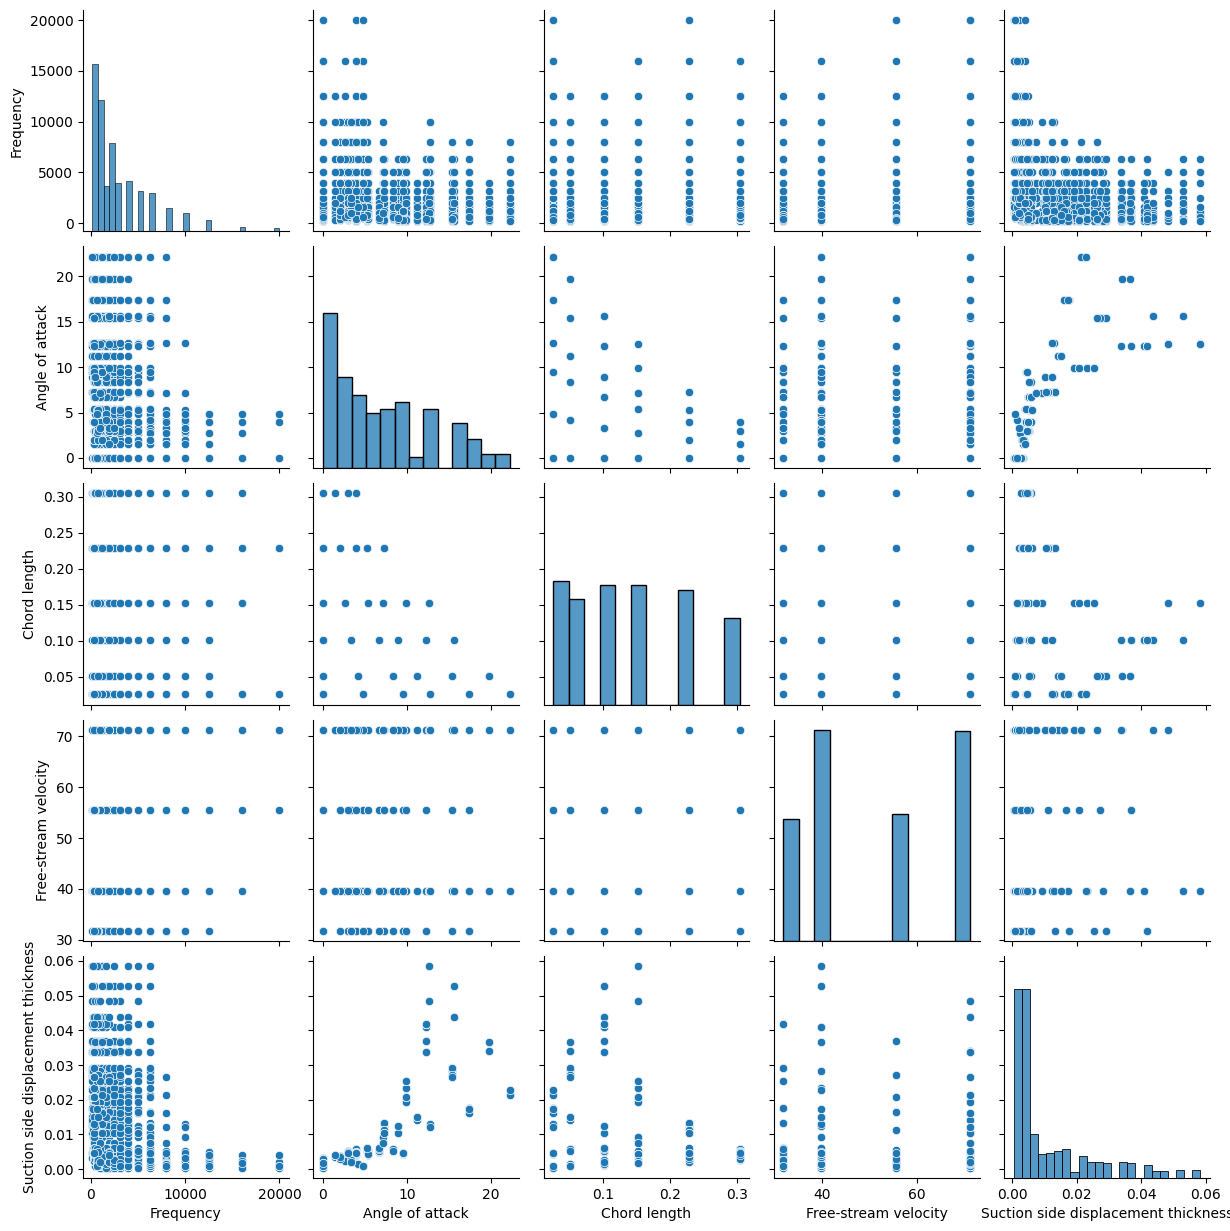

<Figure size 10000x5000 with 0 Axes>

In [28]:
sns.pairplot(X_train)
plt.figure(figsize=(100,50))
plt.show()

In [29]:
X_train.corr()

,Frequency,Angle of attack,Chord length,Free-stream velocity,Suction side displacement thickness
Frequency,1.000000,-0.266594,0.002720,0.137681,-0.234164
Angle of attack,-0.266594,1.000000,-0.513936,0.058255,0.757273
Chord length,0.002720,-0.513936,1.000000,-0.001613,-0.232197
Free-stream velocity,0.137681,0.058255,-0.001613,1.000000,-0.000207
Suction side displacement thickness,-0.234164,0.757273,-0.232197,-0.000207,1.000000


<Figure size 2000x1000 with 0 Axes>

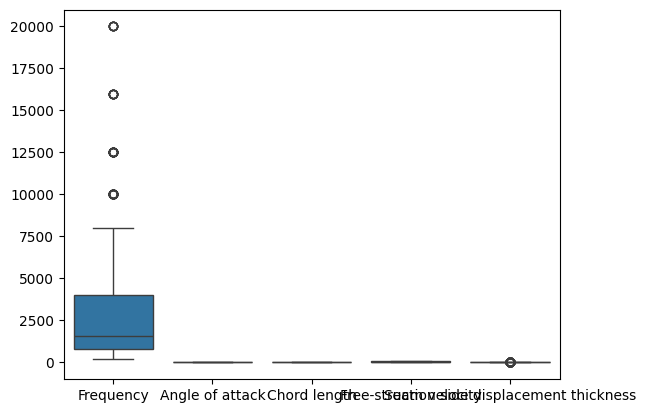

<Figure size 2000x1000 with 0 Axes>

In [30]:
sns.boxplot(data=X_train)
plt.figure(figsize=(20,10)) 

<Axes: ylabel='Frequency'>

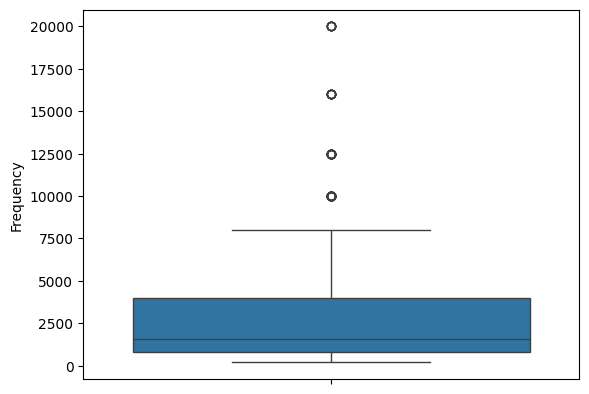

In [31]:
sns.boxplot(X_train["Frequency"])

<Axes: xlabel='Frequency', ylabel='Scaled sound pressure level'>

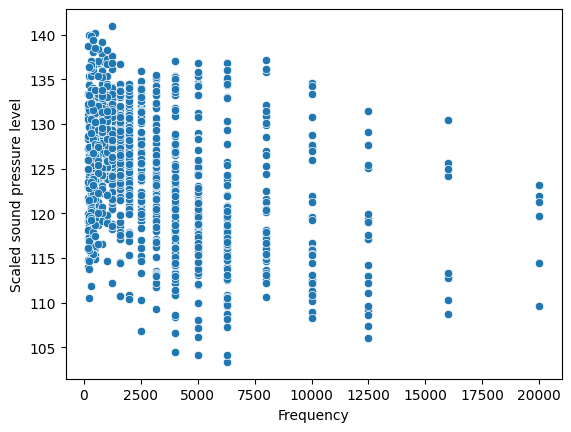

In [32]:
sns.scatterplot(x=X_train['Frequency'],y=y_train)

<Axes: xlabel='Angle of attack', ylabel='Scaled sound pressure level'>

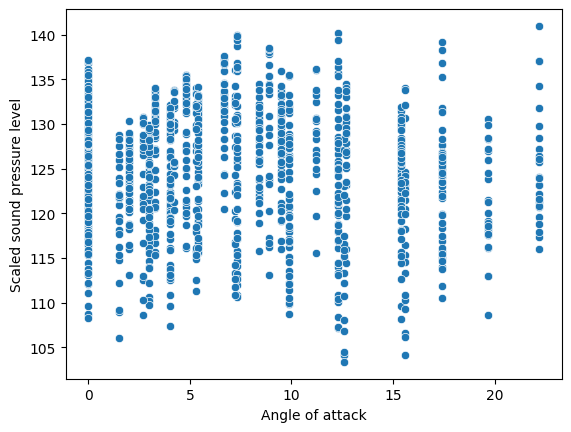

In [33]:
sns.scatterplot(x=X_train['Angle of attack'],y=y_train)

In [34]:
len(df["Scaled sound pressure level"].unique()) # hence it is regression problem


1455

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso,ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score



In [36]:

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler() 
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)


In [37]:
acc={}
for model in [LinearRegression(),Ridge(),Lasso(),ElasticNet(),KNeighborsRegressor(),DecisionTreeRegressor(),RandomForestRegressor()]:
    model.fit(X_train,y_train)
    predictions=model.predict(X_test)
    accuracy=r2_score(y_test,predictions)
    print(f"Model: {model}")
    print(f"R2 Score: {accuracy}")
    acc[model]=accuracy
    


Model: LinearRegression()
R2 Score: 0.5623811750674228
Model: Ridge()
R2 Score: 0.5622275623330237
Model: Lasso()
R2 Score: 0.3710503574095312
Model: ElasticNet()
R2 Score: 0.3464876263196448
Model: KNeighborsRegressor()
R2 Score: 0.8041002769135733
Model: DecisionTreeRegressor()
R2 Score: 0.9096554731642689
Model: RandomForestRegressor()
R2 Score: 0.952937040447786


In [38]:
# best model for prediction is 
best_model=max(acc,key=acc.get)
print(best_model)

RandomForestRegressor()


In [39]:
# import pickle and joblib to save the model
import pickle
import joblib
# save the model to disk
filename='airfoil_noise_model.pkl'
pickle.dump(best_model,open(filename,'wb'))
# save the scaler to disk
joblib.dump(scaler,'scaler.pkl')


['scaler.pkl']

In [40]:
# how to give single prediction
loaded_model=pickle.load(open(filename,'rb'))
loaded_scaler=joblib.load('scaler.pkl')
single_pred=np.array([1000,5,0.15,70,0.005]).reshape(1,-1)
single_pred_scaled=loaded_scaler.transform(single_pred)
result=loaded_model.predict(single_pred_scaled)
print(result)

[132.98976]


C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
